In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [64]:
import numpy as np

def parse_population_file_GA(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    generations_dict = {}
    current_gen = None
    current_population = []

    for line in lines:
        line = line.strip()
        if line.startswith("Generation"):
            # Save the previous generation's population
            if current_gen is not None:
                generations_dict[current_gen] = np.array(current_population)
            # Start a new generation
            current_gen = int(line.split()[1].replace(":", ""))
            current_population = []
        elif line:
            # Convert string to numpy array for individual
            individual = np.fromstring(line.strip("[]"), sep=",")
            current_population.append(individual)

    # Save the last generation's population
    if current_gen is not None:
        generations_dict[current_gen] = np.array(current_population)

    return generations_dict


file_path = 'diversity_train_generalist_1_3_4_6\\optimization_generalist_generalist_GA_20241014-124150\\all_generations_population_GA.txt'  # 替换为你的文件路径
population_dict = parse_population_file_GA(file_path)

for gen, population in population_dict.items():
    print(f"Generation {gen}:")
    print(population)


Generation 0:
[[-0.6748574   0.42502352 -0.28660763 ... -0.84904735  0.08050503
   0.28060286]
 [ 0.34597274 -0.03740283  0.91721439 ...  0.46437816  0.83109732
   0.95367811]
 [ 0.35518785  0.44492904  0.37174571 ...  0.59002114 -0.22079351
   0.68791527]
 ...
 [ 0.87619639 -0.68504967  0.5261842  ... -0.79115571  0.74164447
  -0.63333355]
 [ 0.0223724  -0.64026328  0.29677144 ... -0.2402094   0.68717309
   0.73105885]
 [ 0.43752555 -0.66628785  0.33952514 ...  0.6582246   0.65958409
  -0.27734105]]
Generation 1:
[[ 0.63499662  0.55944793  0.82966548 ... -0.97960929 -0.50527107
   0.86137886]
 [ 0.63900124  0.8147598  -0.44067734 ...  0.02325477  0.07672946
  -0.68748878]
 [-0.00515206  0.58928313 -0.11799253 ...  0.15050635  0.31666912
   0.65200593]
 ...
 [ 0.0223724  -0.64026328  0.29677144 ... -0.2402094   0.68717309
   0.73105885]
 [ 0.6962212   0.57863337 -0.15528227 ...  0.05141809 -0.50852363
   0.72332054]
 [-0.03018035 -0.20216272 -0.91249785 ...  0.17371992 -0.28395752
   0

In [65]:
population_dict.keys()
population_dict[0].shape
population_dict[1].shape
population_dict[0][1]

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

(100, 265)

(100, 265)

array([ 0.34597274, -0.03740283,  0.91721439, -0.20753602, -0.77389609,
        0.80972522,  0.96782316,  0.00684121,  0.02665877, -0.72658501,
        0.42182227,  0.39452571, -0.71161599,  0.96961577, -0.14190228,
        0.99417622,  0.65367136, -0.44314641, -0.03028726, -0.57199197,
       -0.12743297, -0.76639802, -0.20956918,  0.11517859,  0.32164118,
        0.05907344, -0.81742746, -0.9362169 , -0.47025179, -0.78316547,
       -0.65050094, -0.36502959, -0.55861865,  0.26521582,  0.50858262,
       -0.05783169, -0.05360857,  0.64973652, -0.80539301,  0.09345916,
       -0.31366973,  0.69130798, -0.85690632,  0.33902683,  0.0061934 ,
        0.05394687, -0.63012534,  0.98870962,  0.82433549,  0.69811745,
       -0.46581221,  0.9190073 , -0.18715364, -0.01489053,  0.67572244,
        0.44782413,  0.94795012,  0.76203142,  0.89029077,  0.42912827,
        0.76682461, -0.26457366,  0.33835033,  0.26523195, -0.65517379,
        0.63309158,  0.20266465, -0.96917783,  0.2329763 ,  0.16

In [66]:

def parse_population_file_ES(file_path):
    """
    解析文件，将每一代的 population 转换为一个字典，key 是 generation，value 是 population，
    每个 individual 都以 ndarray 的形式保存，整个 population 是一个大的 ndarray。
    """
    with open(file_path, 'r') as f:
        lines = f.readlines()

    generations_dict = {}
    current_gen = None
    current_population = []
    individual_buffer = []

    for line in lines:
        line = line.strip()
        
        # 检查是否是 generation 标记
        if line.startswith("Generation"):
            # 保存上一个 generation 的 population
            if current_gen is not None and current_population:
                generations_dict[current_gen] = np.array(current_population)
            # 获取新的 generation 编号
            current_gen = int(line.split()[1].replace(":", ""))
            current_population = []  # 重置 population 列表
            continue
        
        # 合并 individual 的多行内容
        if "[" in line:
            individual_buffer = [line.strip("[]")]  # 初始化 individual 缓存
        else:
            individual_buffer.append(line.strip("[]"))
        
        # 如果发现 "]"，则认为 individual 结束
        if "]" in line:
            # 将缓存的 individual 转换为 numpy 数组
            individual_str = " ".join(individual_buffer)
            individual = np.fromstring(individual_str, sep=" ")
            current_population.append(individual)
            individual_buffer = []  # 清空缓存

    # 保存最后一代的 population
    if current_gen is not None and current_population:
        generations_dict[current_gen] = np.array(current_population)

    return generations_dict

file_path = 'diversity_train_generalist_1_3_4_6\\optimization_generalist_generalist_ES_20241014-124606\\all_generations_population_ES.txt'  # 替换为你的文件路径
population_dict_ES = parse_population_file_ES(file_path)

for gen, population in population_dict_ES.items():
    print(f"Generation {gen}:")
    print(population)


Generation 0:
[[ 0.58072446  0.95181177  0.39263702 ... -0.63709193  0.5574157
   0.22705164]
 [ 0.11271671 -0.23192029  0.52221431 ... -0.311522   -0.16394987
  -0.97252832]
 [ 0.38913934  0.67177226 -0.79300094 ...  0.43329375 -0.0905454
  -0.75323224]
 ...
 [ 0.11446933 -0.30256954 -0.42492061 ... -0.71744804 -0.19644415
  -0.55993815]
 [ 0.8508944  -0.84633445  0.82049534 ... -0.73641883  0.07627596
   0.98426322]
 [ 0.60149794 -0.85331559  0.14292898 ...  0.58837792  0.53357531
  -0.4113446 ]]
Generation 1:
[[ 0.06894883 -0.55776535  0.26940231 ... -0.17115664 -0.3399887
   0.1285478 ]
 [ 0.60892748 -0.17150203  0.24420112 ...  0.9153471   0.73837865
  -0.2971056 ]
 [ 0.06894883 -0.55776535  0.26940231 ... -0.17115664 -0.3399887
   0.1285478 ]
 ...
 [ 0.93072418 -0.69627141  0.07206235 ...  0.7306969   0.90647139
   0.9687665 ]
 [-0.42864844 -1.10856187 -1.11818723 ...  0.13446171  0.34929847
  -0.85960384]
 [-0.42864844 -1.10856187 -1.11818723 ...  0.13446171  0.34929847
  -0.859

In [67]:
population_dict_ES.keys()

for i in population_dict_ES.keys():
    print(population_dict_ES[i].shape)

population_dict_ES[0][0]


dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)
(100, 265)


array([ 0.58072446,  0.95181177,  0.39263702, -0.48883774, -0.27909586,
        0.15149379,  0.6795749 ,  0.74979642, -0.40054513,  0.73600416,
        0.47504421,  0.72597657,  0.73425871,  0.46588961, -0.90422581,
        0.037041  ,  0.44888961, -0.66956765,  0.7418261 , -0.56618039,
        0.48642446,  0.58501369, -0.97165359, -0.90820534,  0.51503662,
       -0.05584946,  0.69406892, -0.49523803, -0.19787053,  0.64914519,
       -0.68226511, -0.70954178, -0.12026855, -0.80280765,  0.06052111,
        0.25728282, -0.98966881, -0.81375667,  0.753281  , -0.64797787,
       -0.61132301, -0.43261582,  0.25358711,  0.70660268,  0.55104318,
       -0.14324554, -0.12899269, -0.93382436,  0.09714136, -0.79383234,
        0.11483237,  0.69441865,  0.62254677, -0.88031309,  0.3677051 ,
       -0.3272269 ,  0.96308947,  0.06793456,  0.38218457,  0.91175292,
        0.09595339, -0.24453618, -0.9423291 ,  0.56104993, -0.03099641,
        0.04351024,  0.47004325,  0.71960674,  0.13771464, -0.63

In [42]:
population_dict_ES.keys()
population_dict.keys()
population_dict_ES[0].shape
population_dict[0].shape 
population_dict_ES.items()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

(100, 265)

(100, 265)

dict_items([(0, array([[ 0.58072446,  0.95181177,  0.39263702, ..., -0.63709193,
         0.5574157 ,  0.22705164],
       [ 0.11271671, -0.23192029,  0.52221431, ..., -0.311522  ,
        -0.16394987, -0.97252832],
       [ 0.38913934,  0.67177226, -0.79300094, ...,  0.43329375,
        -0.0905454 , -0.75323224],
       ...,
       [ 0.11446933, -0.30256954, -0.42492061, ..., -0.71744804,
        -0.19644415, -0.55993815],
       [ 0.8508944 , -0.84633445,  0.82049534, ..., -0.73641883,
         0.07627596,  0.98426322],
       [ 0.60149794, -0.85331559,  0.14292898, ...,  0.58837792,
         0.53357531, -0.4113446 ]])), (1, array([[ 0.06894883, -0.55776535,  0.26940231, ..., -0.17115664,
        -0.3399887 ,  0.1285478 ],
       [ 0.60892748, -0.17150203,  0.24420112, ...,  0.9153471 ,
         0.73837865, -0.2971056 ],
       [ 0.06894883, -0.55776535,  0.26940231, ..., -0.17115664,
        -0.3399887 ,  0.1285478 ],
       ...,
       [ 0.93072418, -0.69627141,  0.07206235, ...,  

In [47]:
population_dict_ES[0].shape[0] 
population_dict_ES[1][1].shape  

100

(265,)

In [71]:
def similarity(population_dict):

    """
    计算每一代的 population 中所有 individual 两两之间的相似度。
    """

    generations_similarity = {}

    for gen, population in population_dict.items():

        cos_vector = []
        euler_vector = []   
        
        for i in range(population.shape[0]):
            for j in range(i+1, population.shape[0]):
                individual1 = population[i]
                individual2 = population[j]
                cos_similarity = np.dot(individual1, individual2) / (np.linalg.norm(individual1) * np.linalg.norm(individual2))
                euler_distance = np.linalg.norm(individual1 - individual2)
                cos_vector.append(cos_similarity)
                euler_vector.append(euler_distance)


        euler_vector = 1-np.array(euler_vector)/np.max(euler_vector)
        cos_vector = np.array(cos_vector)

        cos_avg = np.mean(cos_vector)
        cos_std = np.std(cos_vector)
        euler_avg = np.mean(euler_vector)
        euler_std = np.std(euler_vector)

       

        generations_similarity[gen] = [cos_avg, cos_std, euler_avg, euler_std]

    return generations_similarity

In [76]:
sim_GA=similarity(population_dict)
sim_ES=similarity(population_dict_ES)

ga_data=pd.DataFrame(
    {
        'generation':list(sim_GA.keys()),
        'cos_avg':[x[0] for x in sim_GA.values()],
        'cos_std':[x[1] for x in sim_GA.values()],
        'euler_avg':[x[2] for x in sim_GA.values()],
        'euler_std':[x[3] for x in sim_GA.values()]
    }
)

es_data=pd.DataFrame(
    {
        'generation':list(sim_ES.keys()),
        'cos_avg':[x[0] for x in sim_ES.values()],
        'cos_std':[x[1] for x in sim_ES.values()],
        'euler_avg':[x[2] for x in sim_ES.values()],
        'euler_std':[x[3] for x in sim_ES.values()]
    }
)

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Generations')

Text(0, 0.5, 'Value')

Text(0.5, 1.0, 'cos_avg and euler_avg across Generations for GA and ES')

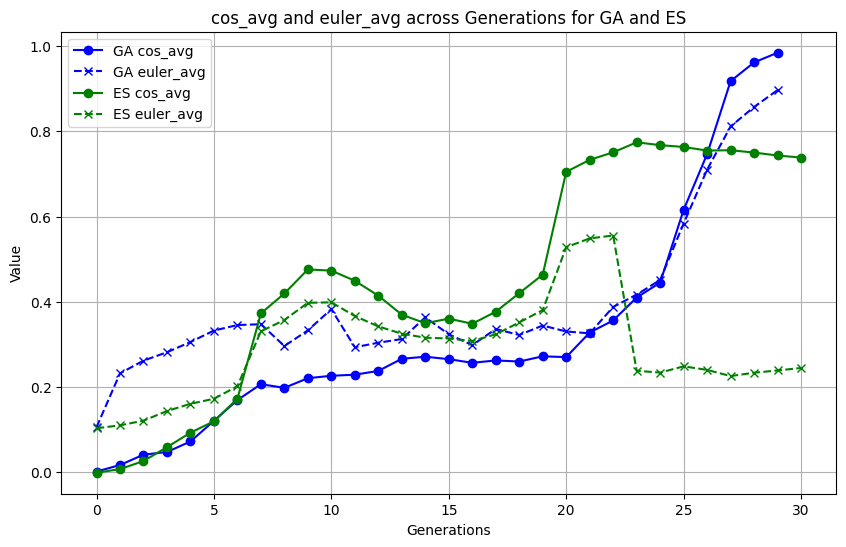

In [77]:


plt.figure(figsize=(10, 6))

# GA lines
plt.plot(ga_data['generation'], ga_data['cos_avg'], label="GA cos_avg", color='blue', marker='o')
plt.plot(ga_data['generation'], ga_data['euler_avg'], label="GA euler_avg", color='blue', linestyle='--', marker='x')

# ES lines
plt.plot(es_data['generation'], es_data['cos_avg'], label="ES cos_avg", color='green', marker='o')
plt.plot(es_data['generation'], es_data['euler_avg'], label="ES euler_avg", color='green', linestyle='--', marker='x')

plt.xlabel("Generations")
plt.ylabel("Value")
plt.title("cos_avg and euler_avg across Generations for GA and ES")
plt.legend()
plt.grid(True)
plt.show()

In [41]:
a=np.array([1,2,3])
b=np.array([4,5,6])
np.dot(a,b)
np.linalg.norm(a)
np.linalg.norm(b) 

32

3.7416573867739413

8.774964387392123